In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Importing ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Loading the data into a dataframe
df=pd.read_csv("employee_retention_data.csv") 
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
#Describing the data
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [8]:
#Determining if there are any missing values; probably are for the quit date
df.isnull().any()

employee_id    False
company_id     False
dept           False
seniority      False
salary         False
join_date      False
quit_date       True
dtype: bool

In [9]:
#Determining the type of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [10]:
#Casting categorical data into numerical data
df.describe(include=['O'])

,dept,join_date,quit_date
count,24702,24702,13510
unique,6,995,664
top,customer_service,2012-01-03,2015-05-08
freq,9180,105,111


In [11]:
df['dept'].unique()

array(['customer_service', 'marketing', 'data_science', 'engineer',
       'sales', 'design'], dtype=object)

In [12]:
#Mapping departments to numbers
df['dept']=df['dept'].map({'customer_service':0 ,'marketing':1, 'data_science':2, 'engineer':3, 'sales':4, 'design':5}).astype(int)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,0,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,1,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,1,14,101000.0,2014-10-13,NaN
3,662910.0,7,0,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,2,23,276000.0,2011-10-17,2014-08-22


In [13]:
#Creating a new "quit" column where 0 is not quit, and 1 is quit
df.insert(len(df.columns),'quit', 1)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,0,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,1,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,1,14,101000.0,2014-10-13,NaN,1
3,662910.0,7,0,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,2,23,276000.0,2011-10-17,2014-08-22,1


In [14]:
df.loc[(pd.isnull(df.quit_date)), 'quit']=0
df.describe()

,employee_id,company_id,dept,seniority,salary,quit
count,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,1.739697,14.127803,138183.345478,0.546919
std,288909.026101,2.700011,1.658392,8.089520,76058.184573,0.497804
min,36.000000,1.000000,0.000000,1.000000,17000.000000,0.000000
25%,250133.750000,1.000000,0.000000,7.000000,79000.000000,0.000000
50%,500793.000000,2.000000,2.000000,14.000000,123000.000000,1.000000
75%,753137.250000,5.000000,3.000000,21.000000,187000.000000,1.000000
max,999969.000000,12.000000,5.000000,99.000000,408000.000000,1.000000


In [15]:
#Creating a new column showing how long the person was at the company
df.insert(len(df.columns),'work_length', 1)

In [16]:
#Making the join and quit dates as datetime structures
df['join_date'] = pd.to_datetime(df['join_date'], format='%Y-%M-%d')
df['quit_date'] = pd.to_datetime(df['quit_date'], format='%Y-%M-%d')

In [17]:
df['work_length'] = (df['quit_date'] - df['join_date'])

In [18]:
last_day = pd.to_datetime('2015-12-13')
df.loc[(pd.isnull(df.work_length)), 'work_length']=(last_day-df['join_date'])
df = df.drop(['join_date','quit_date','employee_id'], axis=1)

In [19]:
df['work_length']=df['work_length'].dt.days

Before I begin looking at the factors in this data set that drive employee churn, several factors that drive employee churn in general include: salary, type of company, number of hours spent at work, number of projects, high stress, etc.

,company_id,dept,seniority,salary,quit,work_length
company_id,1.000000,-0.002573,-0.010026,-0.163892,0.013242,-0.014386
dept,-0.002573,1.000000,-0.002460,0.426412,-0.006684,0.020013
seniority,-0.010026,-0.002460,1.000000,0.559465,0.000496,0.002969
salary,-0.163892,0.426412,0.559465,1.000000,-0.036561,0.060455
quit,0.013242,-0.006684,0.000496,-0.036561,1.000000,-0.125430
work_length,-0.014386,0.020013,0.002969,0.060455,-0.125430,1.000000


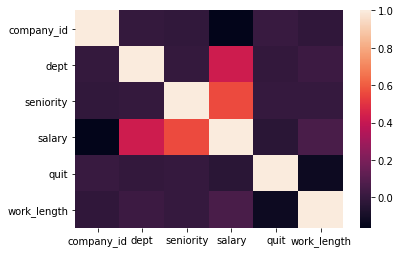

In [20]:
#Correlation Matrix
corr=df.corr()
corr=(corr)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
corr

In [21]:
#Salary
df[['quit', 'salary']].groupby(['quit'], as_index=False).mean().sort_values(by='salary', ascending=False)

,quit,salary
0,0,141238.473910
1,1,135652.405625


With a higher salary, employees are more likely to stay. Thus, salary is a factor in employee churn.

In [22]:
#Seniority
df[['quit', 'seniority']].groupby(['quit'], as_index=False).mean().sort_values(by='seniority', ascending=False)

,quit,seniority
1,1,14.131458
0,0,14.123392


Surprisingly, there is not much difference in employee attrition based on seniority.

In [23]:
#Work length
df[['quit', 'work_length']].groupby(['quit'], as_index=False).mean().sort_values(by='work_length', ascending=False)

,quit,work_length
0,0,698.730879
1,1,606.316432


There is not much difference in employee attrition based on work length. However, there is a slight increase in the length of time worked by the employees who stay in their place of work.

In [24]:
#Quitting probability based on department type
df[['quit', 'dept']].groupby(['dept'], as_index=False).mean().sort_values(by='quit', ascending=False)

,dept,quit
4,4,0.570933
5,5,0.563768
1,1,0.562993
0,0,0.554902
2,2,0.527273
3,3,0.512031


There is not much difference in employees staying depending upon the department. This was sorted by department since sorting by quitting would not provide much information.

In [25]:
#Company type
df[['quit', 'company_id']].groupby(['company_id'], as_index=False).mean().sort_values(by='quit', ascending=False)

,company_id,quit
10,11,0.750000
6,7,0.565359
4,5,0.560114
3,4,0.559166
2,3,0.556930
9,10,0.554913
7,8,0.553009
5,6,0.551510
8,9,0.550468
0,1,0.544544


Employees really do not like to work at company 11, so company is a factor. Otherwise, there is not much difference in employee attrition baased on company.

In [26]:
#Determining how many people worked for each company (sample size)
for i in range(12):
    i+=1
    print (i, (df['company_id']==i).sum())

1 8486
2 4222
3 2749
4 2062
5 1755
6 1291
7 1224
8 1047
9 961
10 865
11 16
12 24


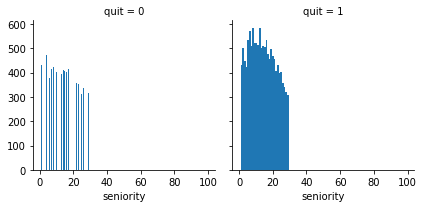

In [27]:
g=sns.FacetGrid(df, col='quit')
g.map(plt.hist, 'seniority', bins=100)

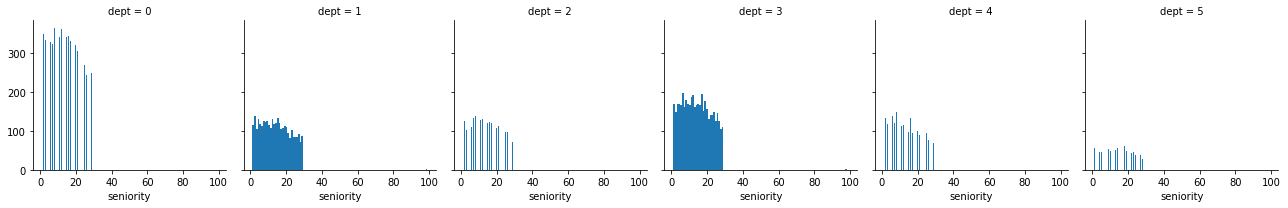

In [28]:
g=sns.FacetGrid(df, col='dept')
g.map(plt.hist, 'seniority', bins=100)

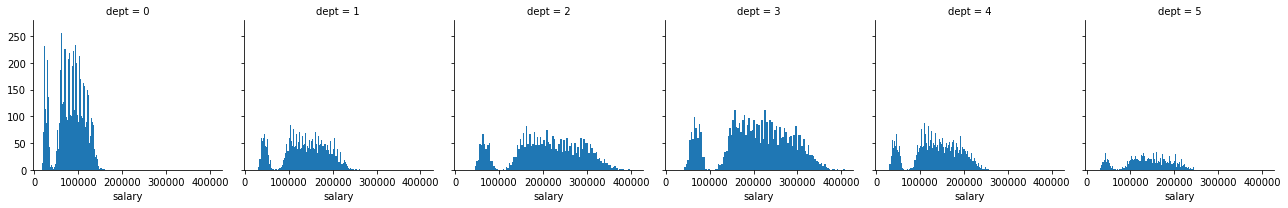

In [29]:
g=sns.FacetGrid(df, col='dept')
g.map(plt.hist, 'salary', bins=100)

Departments are correlated with salary- those with the salaries in the higher ranges are the departments with slightly higher employee attrition.

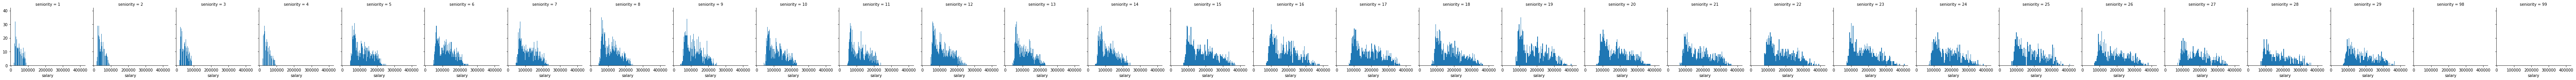

In [30]:
g=sns.FacetGrid(df, col='seniority')
g.map(plt.hist, 'salary', bins=100)

Salary distribution widens as seniority increases, which makes sense.

In [31]:
#Splitting data into train and test for models
nHead=int(len(df)*0.8)
nTail=int(len(df)*0.2)
X_train=df.drop("quit", axis=1).head(nHead)
X_test=df.drop("quit", axis=1).tail(nTail)
Y_train=df["quit"].head(nHead)
Y_test=df["quit"].tail(nTail)

In [32]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train);
accuracy_score(Y_test, logreg.predict(X_test))

/Users/kendallhoover/miniconda3/envs/challenges_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5591093117408907

In [29]:
print(classification_report(Y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.31      0.39      2190
           1       0.58      0.75      0.66      2750

   micro avg       0.56      0.56      0.56      4940
   macro avg       0.54      0.53      0.52      4940
weighted avg       0.55      0.56      0.54      4940



In [30]:
#K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = knn.score(X_test, Y_test)
acc_knn

0.8827935222672065

In [31]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = decision_tree.score(X_test, Y_test)
acc_decision_tree

0.9449392712550607

One potential variable to include would be the number of hours worked, trying to get at the work-life balance. I belive this would give more insight into whether employees would leave and quit the company.